# TP3
Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en  
Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

## Parte 1
Obtener una detección del logo en cada imagen sin falsos positivos

In [70]:
# Importamos librerias
from imutils.object_detection import non_max_suppression
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [71]:
# cargamos imagenes
img_l1 = cv.imread('./images/coca_logo_1.png')
img_l2 = cv.imread('./images/coca_logo_2.png')
img_L = cv.imread('./images/COCA-COLA-LOGO.jpg')
img_multi = cv.imread('./images/coca_multi.png')
img_re1 = cv.imread('./images/coca_retro_1.png')
img_re2 = cv.imread('./images/coca_retro_2.png')
img_logo = cv.imread('./images/logo_1.png')

# pasamos a rgb
img_l1_rgb = cv.cvtColor(img_l1, cv.COLOR_BGR2RGB)
img_l2_rgb = cv.cvtColor(img_l2, cv.COLOR_BGR2RGB)
img_L_rgb = cv.cvtColor(img_L, cv.COLOR_BGR2RGB)
img_multi_rgb = cv.cvtColor(img_multi, cv.COLOR_BGR2RGB)
img_re1_rgb = cv.cvtColor(img_re1, cv.COLOR_BGR2RGB)
img_re2_rgb = cv.cvtColor(img_re2, cv.COLOR_BGR2RGB)
img_logo_rgb = cv.cvtColor(img_logo, cv.COLOR_BGR2RGB)

# pasamos a escala de grises
img_l1_gray = cv.cvtColor(img_l1, cv.COLOR_BGR2GRAY)
img_l2_gray = cv.cvtColor(img_l2, cv.COLOR_BGR2GRAY)
img_L_gray = cv.cvtColor(img_L, cv.COLOR_BGR2GRAY)
img_multi_gray = cv.cvtColor(img_multi, cv.COLOR_BGR2GRAY)
img_re1_gray = cv.cvtColor(img_re1, cv.COLOR_BGR2GRAY)
img_re2_gray = cv.cvtColor(img_re2, cv.COLOR_BGR2GRAY)
img_logo_gray = cv.cvtColor(img_logo, cv.COLOR_BGR2GRAY)

# cargamos template
template = cv.imread('./template/pattern.png',0)

/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_998/1667039237.py:9: UserWarning: The figure layout has changed to tight
  figure.tight_layout(pad=1)


<function matplotlib.pyplot.show(close=None, block=None)>

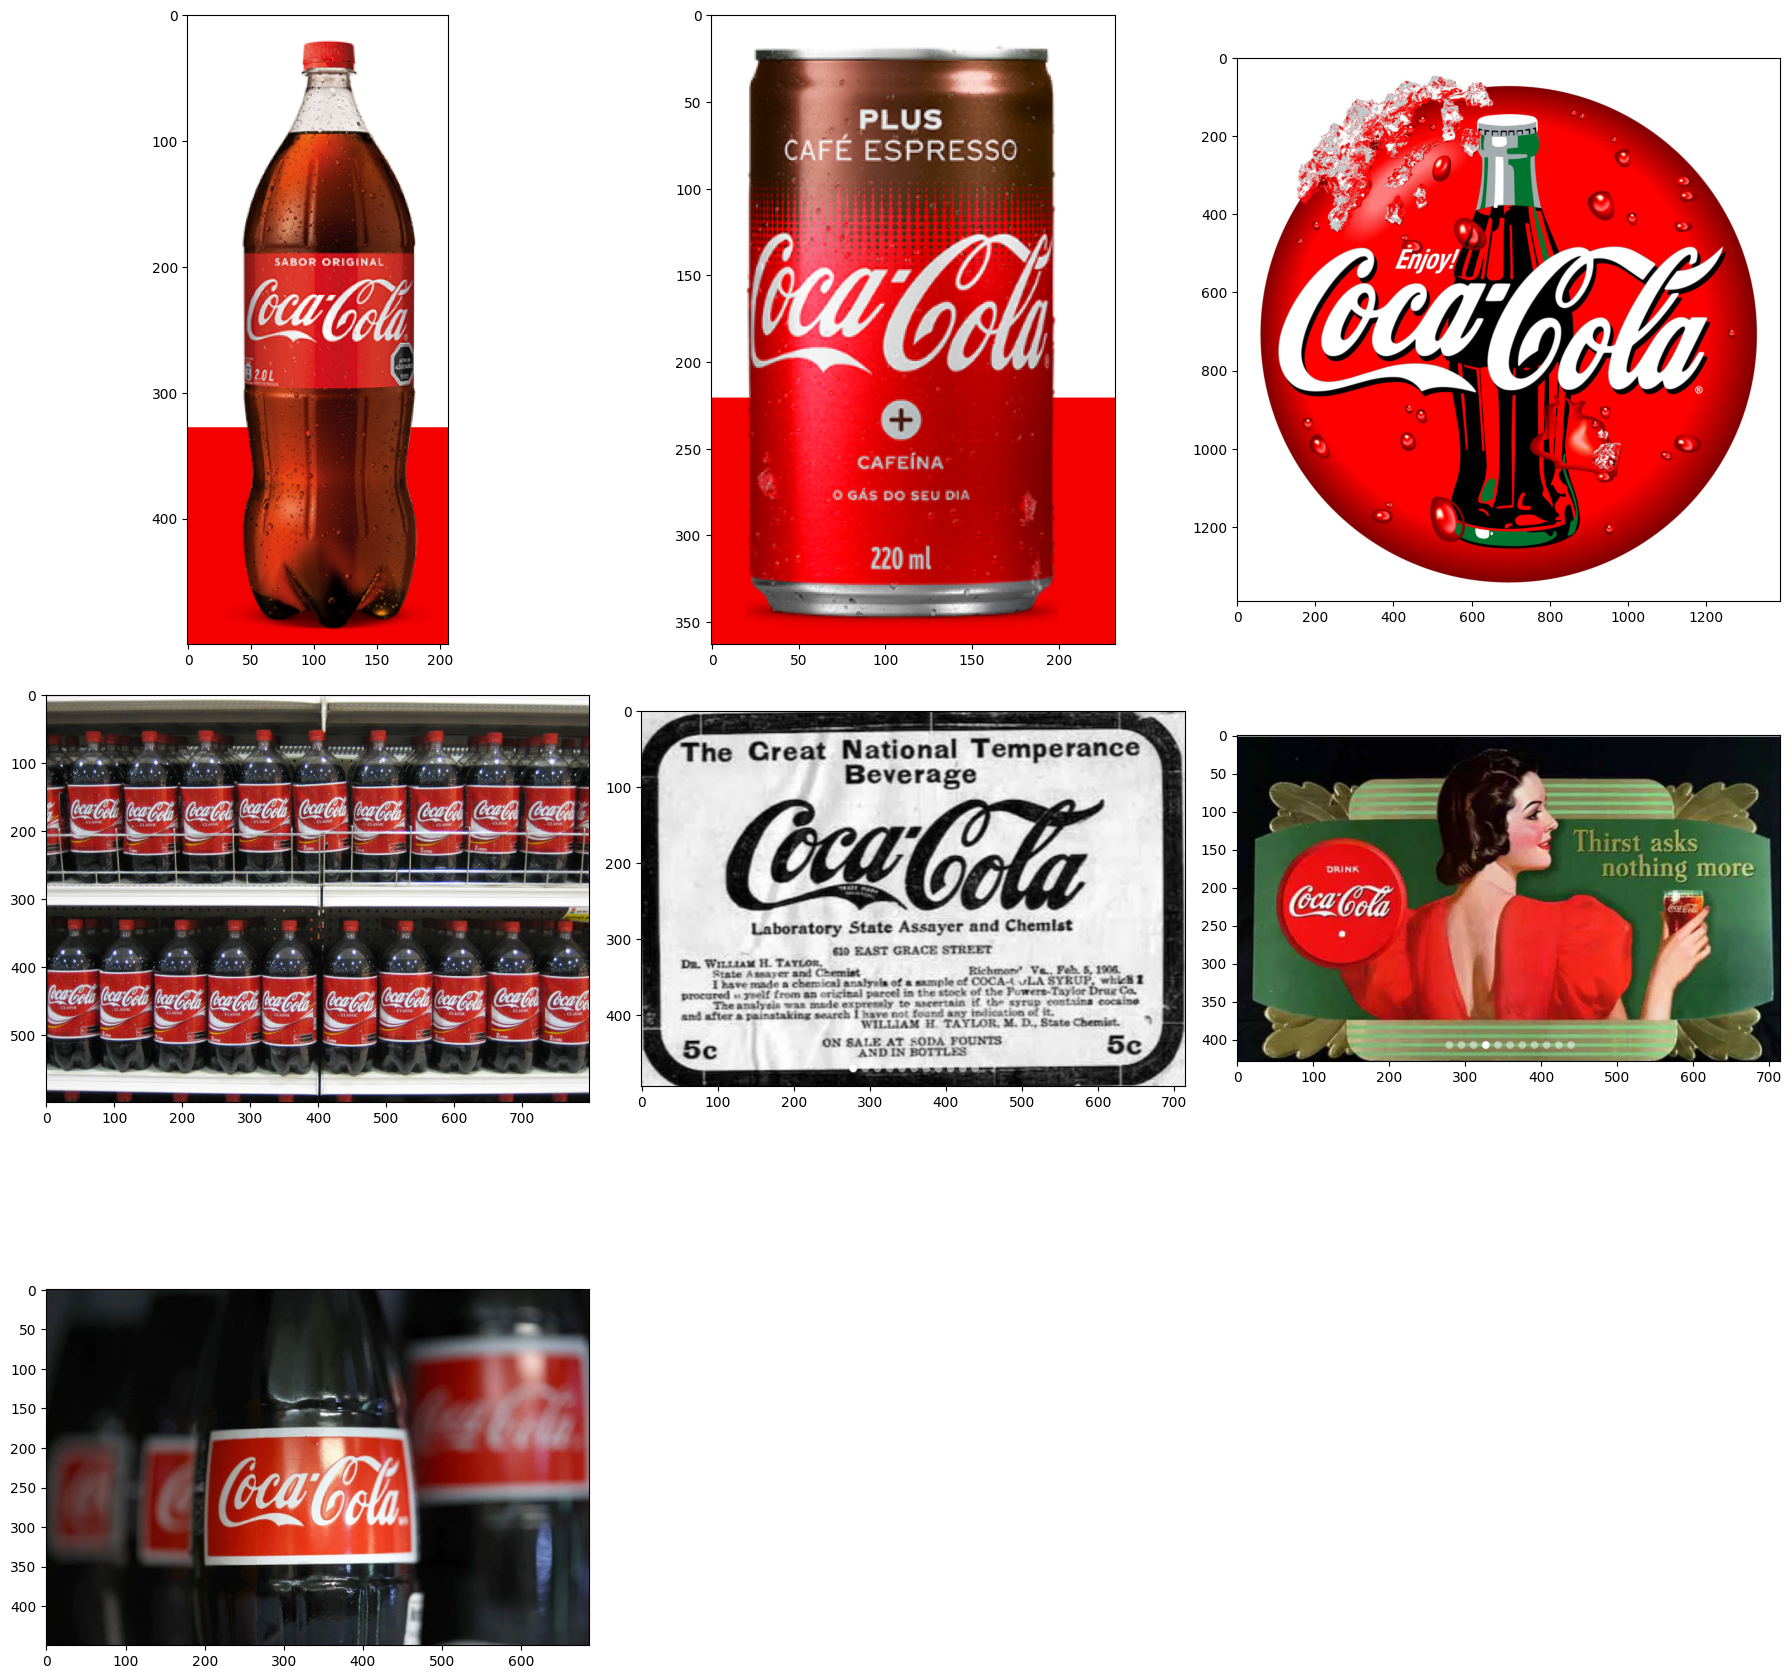

In [72]:
# imprimimos imagenes
images_list_rgb = [img_l1_rgb, img_l2_rgb, img_L_rgb,
               img_multi_rgb, img_re1_rgb, img_re2_rgb, 
               img_logo_rgb]
figure = plt.figure(figsize=(18,18))
for i in range(len(images_list_rgb)):
    figure.add_subplot(3, 3, i+1)
    plt.imshow(images_list_rgb[i])
    figure.tight_layout(pad=1)
plt.show

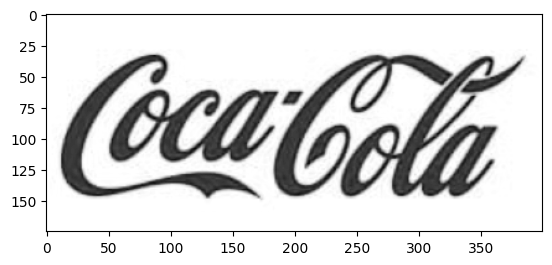

In [73]:
# mostramos template 
plt.imshow(template, cmap='gray')

**Observacion**

Como primera observacion el template para algunas imagenes mostradas anteriormente, queda muy chico o muy grande, es decir, dependiendo de la imagen podemos tener un problema con la escala.

In [74]:
w, h = template.shape[::-1]
print(f"Template -> Ancho: {w}, Altura: {h}")

Template -> Ancho: 400, Altura: 175


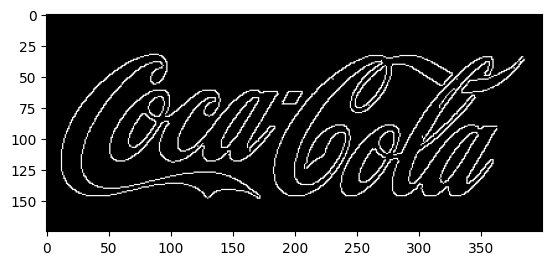

In [75]:
"""
Aplicamos canny para deteccion de bordes en la plantilla
para aumentar la efectividad de la deteccion.
"""
template_canny = cv.Canny(template, threshold1=50, threshold2=200)
plt.imshow(template_canny, cmap='gray')

In [76]:
# funcion para detectar logo
def logo_detector(img_gray, img_rgb, template, method):

    """
    Esta funcion detectara un objecto en una imagen
    basandose en template matching

    img_gray: imagen en escala de grises
    img_rgb: imagen en rgb
    template: template una vez se le halla aplicado Canny
    method: metodo para la comparacion
    """
    
    # tomamos dimensiones del template
    w_template, h_template = template.shape[::-1]

    ## ajustamos la escala de la imagen para que funcione el template match
    # Iteramos sobre 20 escalas de 4.0 -> 0.1
    scales = np.linspace(0.1, 4.0, 20)[::-1]

    # best_val nos dara el mejor valor de correlacion
    best_val = 0

    # best_match nos dara la mejor ubicacion y la escala
    best_match = 0

    for scale in scales:
        img_resize = cv.resize(img_gray, None, fx=scale, fy=scale)

        w_resize, h_resize = img_resize.shape[::-1]

        if w_resize < w_template or h_resize < h_template:
            print("WARNNING: Imagen más pequeña que el logo")
            print("INFO: se toma la escala anterior")
            break

        """
        Aplicamos canny para deteccion de bordes tambien en la imagen
        para aumentar la efectividad de la deteccion del logo.
        """
        img_edge = cv.Canny(img_resize, 50,200)

        # aplicamos template match -> sale mapa de calor
        tem_match = cv.matchTemplate(img_edge, template, method)
        _, max_val, _, max_loc = cv.minMaxLoc(tem_match)

        # Comparamos para encontrar el best_value donde la corr sea mayor
        if max_val > best_val:
            # Guardamos mejores valores
            best_val = max_val
            best_match = (max_loc, scale) # tomamos la ubicacion y mejor escala 
                                          # donde se detecto el objeto

    # la ubicacion y mejor escala donde se detecto el objeto
    top_left, best_scale = best_match

    """
    creamos bordes del rectangulo para el logo detectado y
    escalamos la deteccion para la imagen original
    """
    top_left_scaled = (int(top_left[0] / best_scale), int(top_left[1] / best_scale))
    bottom_right = (int((top_left[0] + w_template)/ best_scale), int((top_left[1] + h_template) / best_scale))

    
    img_output = img_rgb.copy()
    # Dibujamos rectangulo
    cv.rectangle(img_output,top_left_scaled, bottom_right, color=(0,0,255),thickness=2)

    return img_output, best_scale, best_val

WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior


/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_998/436044416.py:19: UserWarning: The figure layout has changed to tight
  figure.tight_layout(pad=1)


WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior


<function matplotlib.pyplot.show(close=None, block=None)>

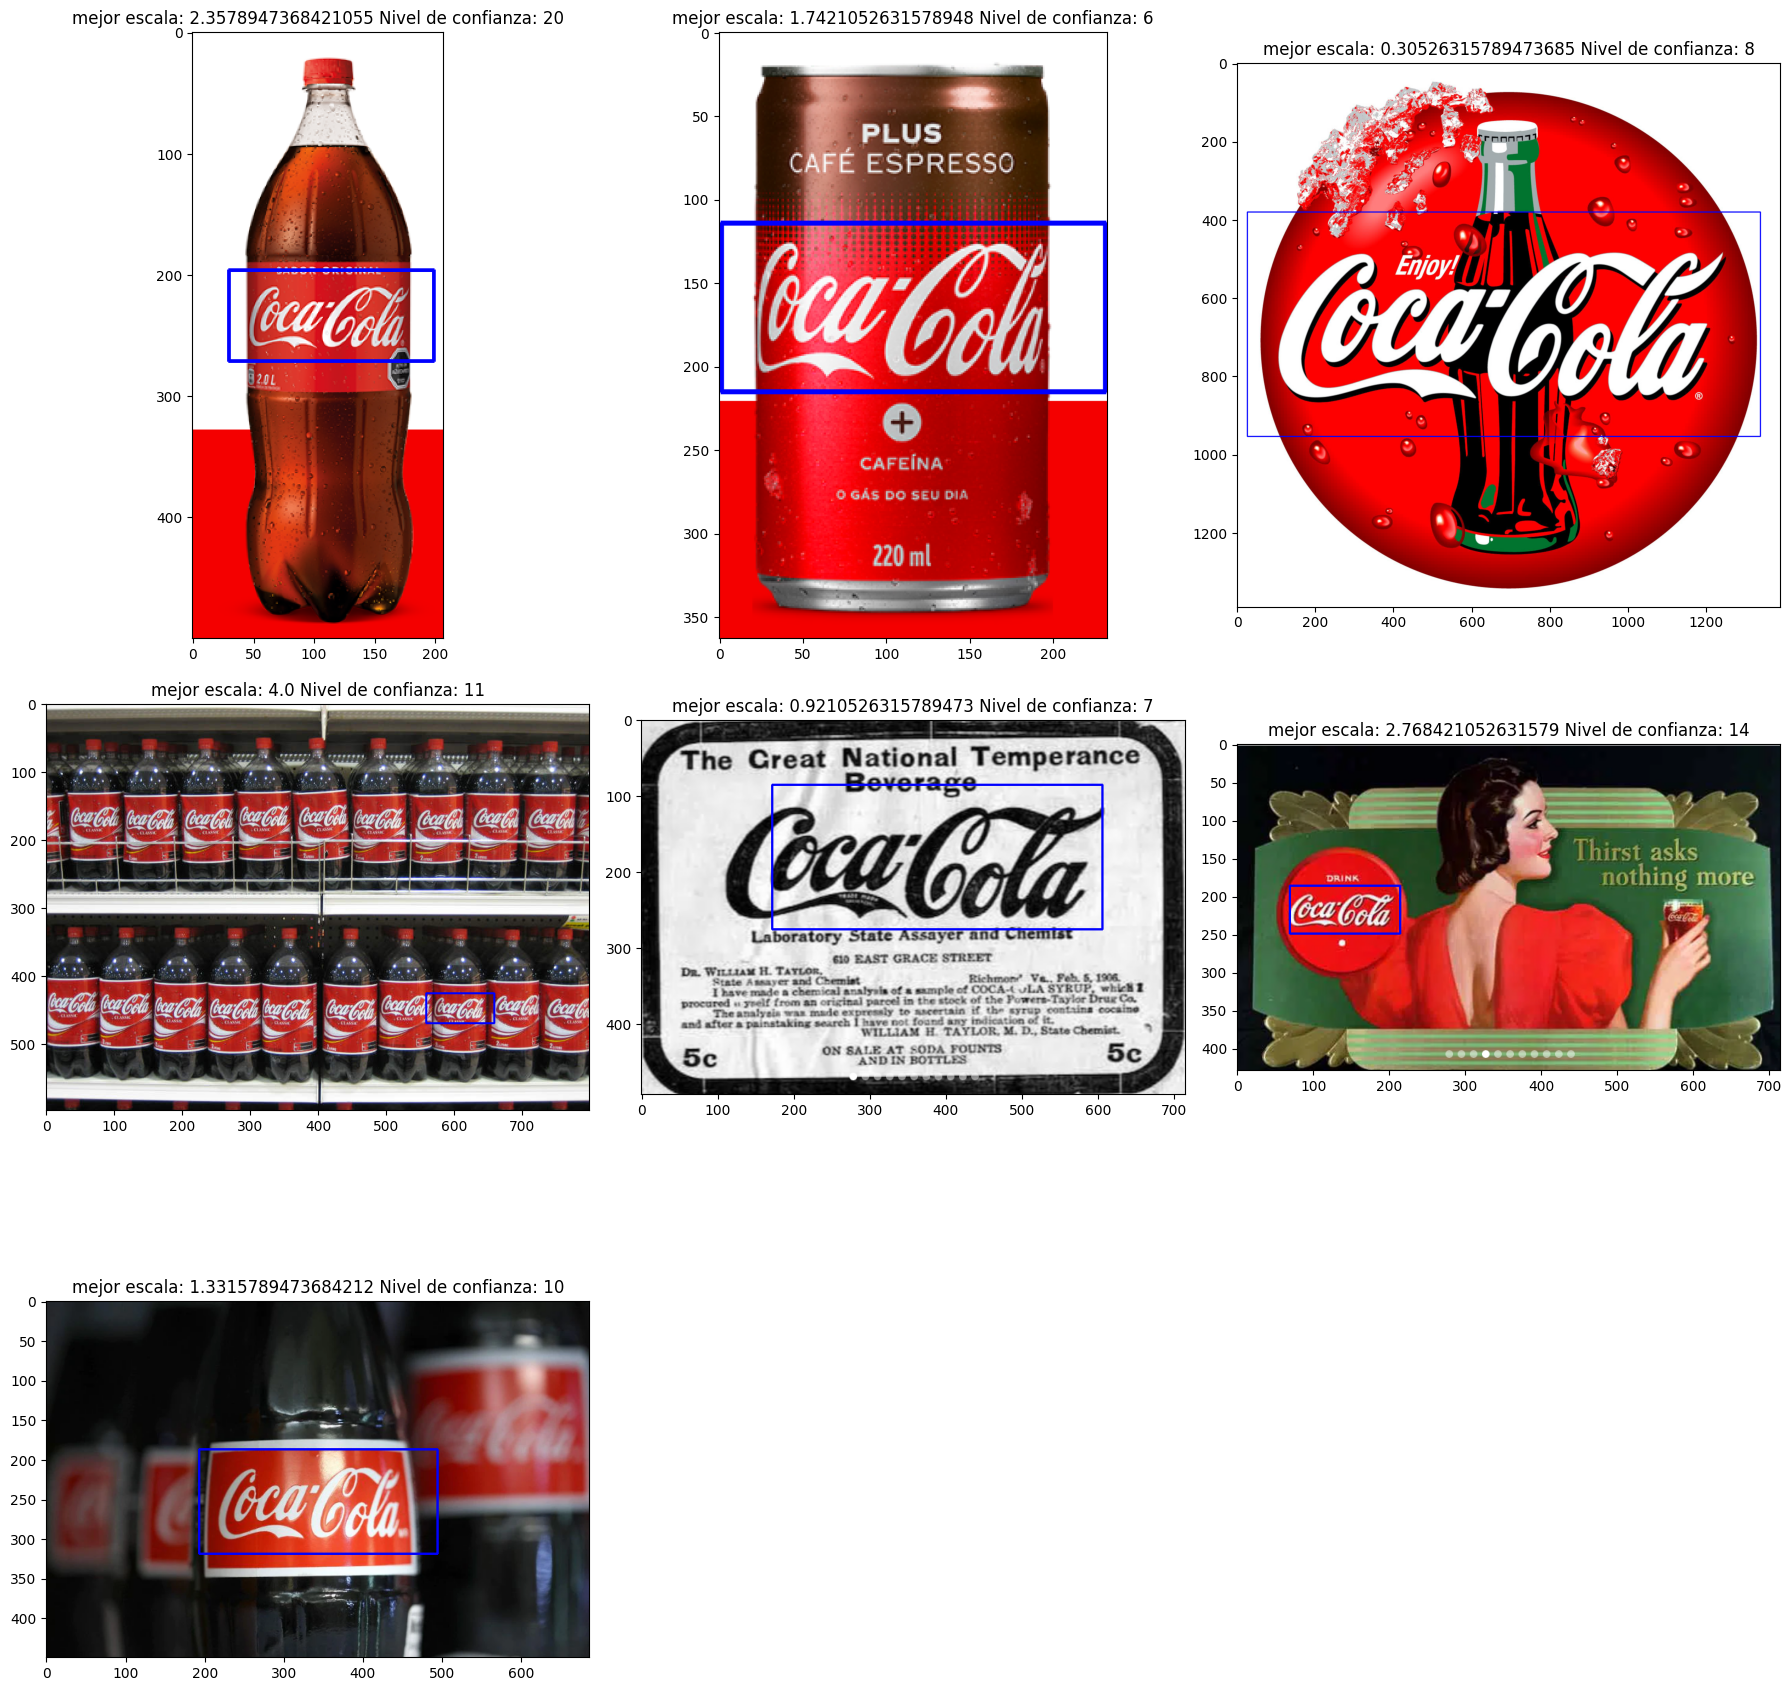

In [77]:
# escogemos la metrica de deteccion
method = eval('cv.TM_CCOEFF_NORMED')
# lista de imagenes en escala de grises
img_list_gray = [img_l1_gray, img_l2_gray, img_L_gray,
               img_multi_gray, img_re1_gray, img_re2_gray, 
               img_logo_gray]

images_list_rgb = [img_l1_rgb, img_l2_rgb, img_L_rgb,
               img_multi_rgb, img_re1_rgb, img_re2_rgb, 
               img_logo_rgb]

# llamamos funcion para detectar el logo
figure = plt.figure(figsize=(18,18))
for i in range(len(img_list_gray)):
    img_temMatch, b_scale, max_val = logo_detector(img_list_gray[i], images_list_rgb[i],template_canny, method)
    figure.add_subplot(3, 3, i+1)
    plt.imshow(img_temMatch)
    plt.title(f"mejor escala: {b_scale} Nivel de confianza: {int(max_val * 100)}")
    figure.tight_layout(pad=1)
plt.show

**Analisis**

De esta primera parte, se pudo observar una de las deventajas de template matching, donde las escalas de los logos varia con respecto al template. Sin embargo, una de las formas para arreglar estas diferencias de escala, es probando con distintos tamaños de la misma imagen contra el template original y posteriormente luego de encontrar la que más se ajuste a nuestro template, se guarda su ubicación y por ultimo se reescala para tomar la deteccion con la imagen original. 

Adicionalmente, para facilitar un poco más la deteccion se utilizo el algoritmo de Canny para extraer los bordes tanto del template como de la imagen y así evitamos problemas con los fondos y cambios de intesidad que puedan tener las imagenes. 

## Parte 2

Plantear y validar un algoritmo para múltiples detecciones en la imagen
coca_multi.png con el mismo témplate del ítem 1

In [78]:
def tm_multi_obj(img_gray, img_rgb, template, method):

    """
    Esta funcion detectara multiples objectos en una imagen
    basandose en template matching

    img_gray: imagen en escala de grises
    img_rgb: imagen en rgb
    template: template una vez se le halla aplicado Canny
    method: metodo para la comparacion
    """

    w_template, h_template = template.shape[::-1]

    best_val = 0

    # resize image 
    scales = np.linspace(0.1, 4.0, 20)[::-1]
    for scale in scales:
        img_resize = cv.resize(img_gray, None, fx=scale, fy=scale)

        w_resize, h_resize = img_resize.shape[::-1]

        if w_resize < w_template or h_resize < h_template:
            print("WARNNING: Imagen más pequeña que el logo")
            print("INFO: se toma la escala anterior")
            break

        # extraccion de bordes con Canny
        img_edge = cv.Canny(img_resize, 50,200)

        # usamos template matching
        tm = cv.matchTemplate(img_edge, template, method)
        _, max_val, _, _ = cv.minMaxLoc(tm)

        # Comparamos para encontrar el best_value donde la corr sea mayor
        if max_val > best_val:
            # Guardamos mejores valores
            best_val = max_val
            last_scale = scale
            save_tm = tm

    img_out = img_rgb.copy()
    # usamos un threshold como filtro de weak matches 
    threshold = 0.06
    loc = np.where( save_tm >= threshold)
    detections_list = []
    
    for position in zip(*loc[::-1]):
        X_start = int(position[0] / last_scale)
        Y_start = int(position[1] / last_scale)
        X_end =  int((position[0] + w_template) / last_scale)
        Y_end = int((position[1] + h_template)/ last_scale)
        detections_list.append((X_start, Y_start, X_end, Y_end))
    # aplicamos NMS
    pick = non_max_suppression(np.array(detections_list))
    # dibujamos los rectangulos en las detecciones
    for (startX, startY, endX, endY) in pick:
        cv.rectangle(img_out, (startX, startY), (endX, endY), color=(0,255,0),thickness=2)

    return img_out, best_val

WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior


Text(0.5, 1.0, 'Nivel de confianza: 11%')

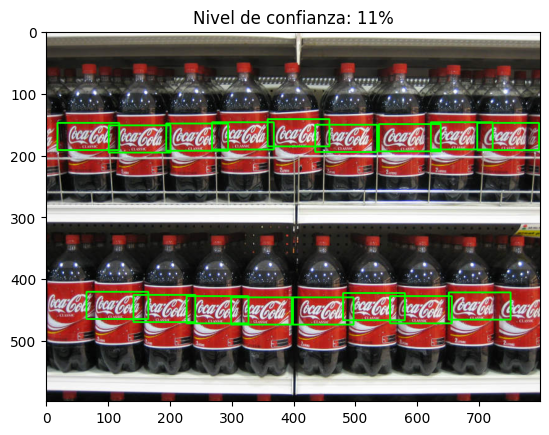

In [79]:
multi_detec, b_val = tm_multi_obj(img_multi_gray, img_multi_rgb, template_canny, method)

# graficamos
plt.imshow(multi_detec)
plt.title(f'Nivel de confianza: {int(b_val * 100)}%')

**Analisis**

En esta segunda parte, se trabajo de vuelta con template matching, pero para la deteccion de multiples logos y se tuvo que lidear nuevamente con la limitacion de la variacion de las escalas entre la imagen original y el template usado. 

Para la deteccion de multiples logos se hace uso de un umbral que limitará la cantidad de logos que se podrán detectar, es decir, este actua como filtro para dejar solo las detecciones que superen o igualen su valor, que por la metrica tomada debería ser donde el valor de correlación sea maximo.

Al aplicar multiples detecciones por este metodo (template matching), obtendremos multiples rectangulos superpuestos. Esto debido a que estas operaciones se calculan pixel a pixel y cuando nos encontremos con maximos que estan en la zona de deteccion es posible crear un rectangulo por cada coincidencia. Para esto se uso NMS para colapsar estas detecciones en una.

Por otro lado, como parte de un preprocesamiento y para efectivizar más la deteccion tambien se hizo uso de la extración de bordes con Canny.

## Parte 3
Generalizar el algoritmo del item 2 para todas las imágenes.

In [80]:
def general_detection(img_gray, img_rgb, template, method):

    """
    Esta funcion generaliza la deteccion de uno
    o varios objecto en una imagen
    basandose en template matching

    img_gray: imagen en escala de grises
    img_rgb: imagen en rgb
    template: template una vez se le halla aplicado Canny
    method: metodo para la comparacion
    """

    w_template, h_template = template.shape[::-1]

    best_val = 0

    # resize image 
    scales = np.linspace(0.1, 4.0, 55)[::-1]
    for scale in scales:
        img_resize = cv.resize(img_gray, None, fx=scale, fy=scale)

        w_resize, h_resize = img_resize.shape[::-1]

        if w_resize < w_template or h_resize < h_template:
            print("WARNNING: Imagen más pequeña que el logo")
            print("INFO: se toma la escala anterior")
            break

        # extraccion de bordes con Canny
        img_edge = cv.Canny(img_resize, 50,200)

        # usamos template matching
        tm = cv.matchTemplate(img_edge, template, method)
        _, max_val, _, _ = cv.minMaxLoc(tm)

        # Comparamos para encontrar el best_value donde la corr sea mayor
        if max_val > best_val:
            # Guardamos mejores valores
            best_val = max_val
            last_scale = scale
            save_tm = tm

    img_out = img_rgb.copy()
    # usamos un threshold como filtro de weak matches 
    threshold = 0.07
    loc = np.where( save_tm >= threshold)
    detections_list = []
    
    for position in zip(*loc[::-1]):
        X_start = int(position[0] / last_scale)
        Y_start = int(position[1] / last_scale)
        X_end =  int((position[0] + w_template) / last_scale)
        Y_end = int((position[1] + h_template)/ last_scale)
        detections_list.append((X_start, Y_start, X_end, Y_end))
    # aplicamos NMS
    pick = non_max_suppression(np.array(detections_list))
    # dibujamos los rectangulos en las detecciones
    for (startX, startY, endX, endY) in pick:
        cv.rectangle(img_out, (startX, startY), (endX, endY), color=(0,255,0),thickness=2)

    return img_out, best_val

WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior


/var/folders/th/f02nw4xd4xg6c6tc6mn55h800000gn/T/ipykernel_998/2033894378.py:7: UserWarning: The figure layout has changed to tight
  figure.tight_layout(pad=1)


WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior
WARNNING: Imagen más pequeña que el logo
INFO: se toma la escala anterior


<function matplotlib.pyplot.show(close=None, block=None)>

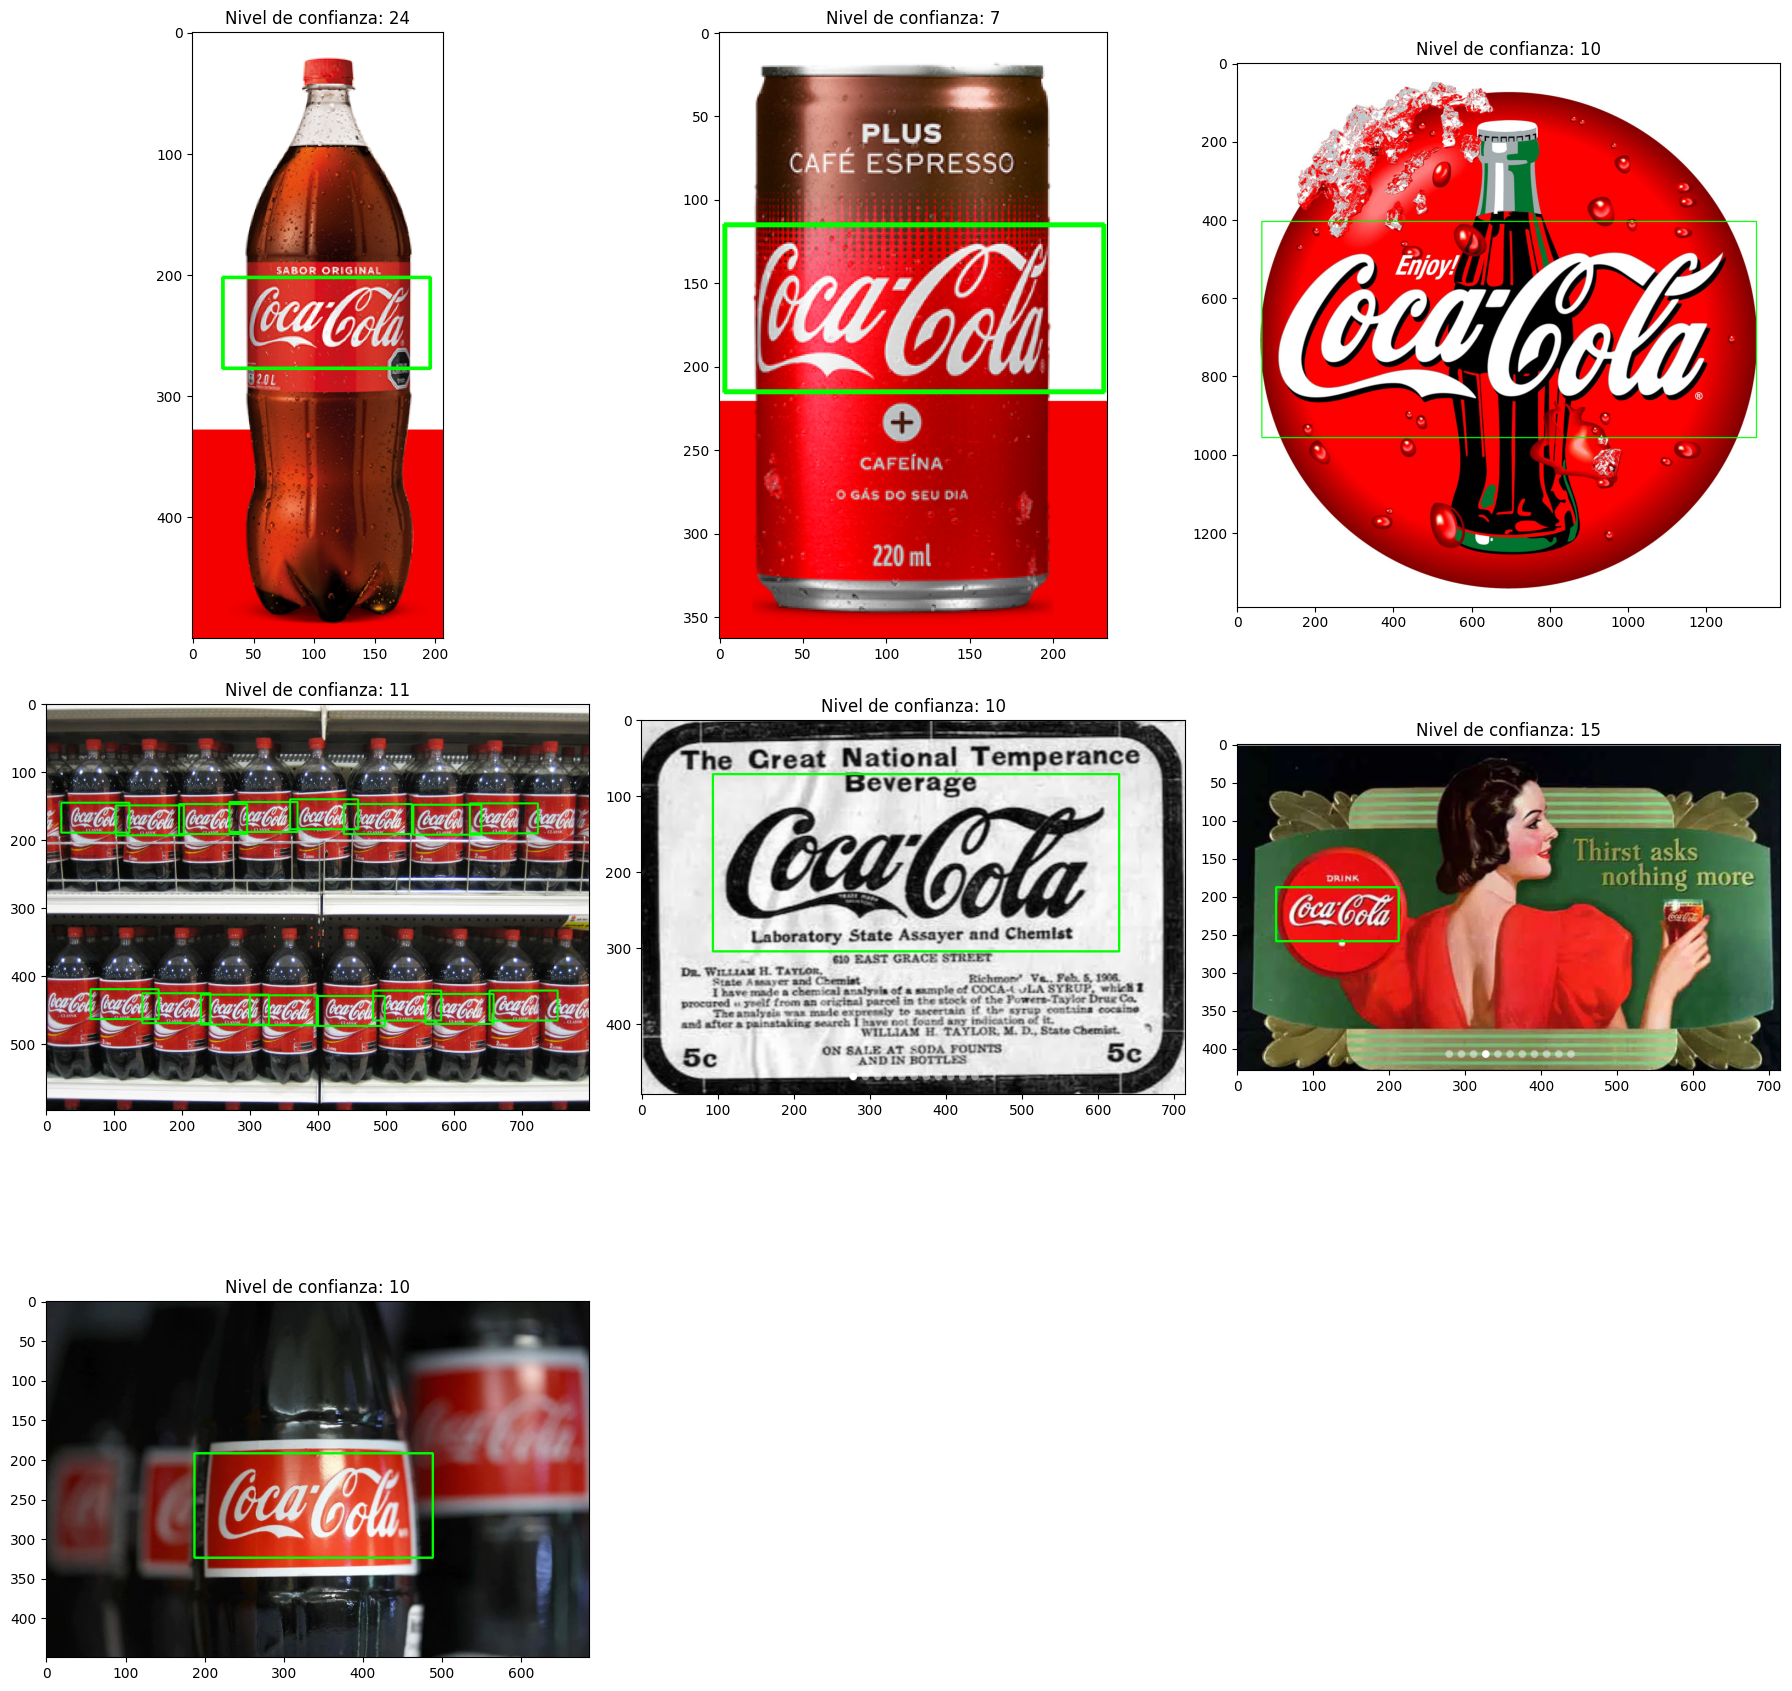

In [81]:
figure = plt.figure(figsize=(18,18))
for i in range(len(img_list_gray)):
    obj_detect, b_val_2 = general_detection(img_list_gray[i], images_list_rgb[i],template_canny, method)
    figure.add_subplot(3, 3, i+1)
    plt.imshow(obj_detect)
    plt.title(f"Nivel de confianza: {int(b_val_2 * 100)}")
    figure.tight_layout(pad=1)
plt.show


**Analisis**

Como se puede observar el algoritmo varia muy poco con repecto al algoritmo del item 2. Sin embargo, en este caso fue necesario ajustar las escalas o tambien se pudo variar el umbral, pero en algunos casos resultaba en la aparición de falsos positivos.